In [1]:
import uproot
import pandas as pd
import awkward as ak
import math
import os
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import nbformat
import sklearn.metrics as metrics
print(nbformat.__version__)

5.10.4


In [16]:
df = pd.read_pickle("run3_newdatalabels/testruns/modelsaves/model_output_eval_logits.pt")
df

,e,mu,pi_pi0,pi,pi_2pi0,3pi,3pi_pi0,background,labels_true,energy
0,4.199413,-20.613245,-6.211762,-5.584483,-14.206229,-26.001600,-42.937565,-142.083282,0.0,1.123230
1,-3.631724,-7.011152,1.837086,-2.562950,-2.732502,-4.666825,-5.044782,-38.054741,2.0,2.037538
2,-4.998479,-10.679802,0.982390,-2.005992,-3.696888,-6.015706,-6.557165,-53.710255,2.0,1.748015
3,5.048523,-24.029818,-7.772305,-6.657868,-16.795921,-32.779083,-54.285057,-171.025909,0.0,0.720106
4,6.571649,-32.527073,-10.345984,-9.814054,-23.016476,-51.017471,-85.519669,-229.504532,0.0,0.078040
...,...,...,...,...,...,...,...,...,...,...
38,-8.041726,-63.488823,-1.000792,-10.532568,0.479616,-9.411034,-2.563019,-160.083527,4.0,1.582655
39,-6.264182,-25.256706,-0.118070,-4.490878,-1.017967,-3.640945,-1.653200,-69.019455,2.0,1.067941
40,3.456120,-16.200304,-5.177287,-4.773264,-12.084061,-22.355288,-36.619125,-119.452820,0.0,0.827521
41,-9.994946,-6.913410,-7.821282,5.471360,-12.302217,-14.636771,-24.185349,-151.350220,3.0,0.609942


AUC for e: 0.9973050449402885
AUC for mu: 0.9991102274747249
AUC for pi_pi0: 0.9657673067050715
AUC for pi: 0.9846712669129662
AUC for pi_2pi0: 0.9450932201797051
AUC for 3pi: 0.9849235950547104
AUC for 3pi_pi0: 0.9629754812768667


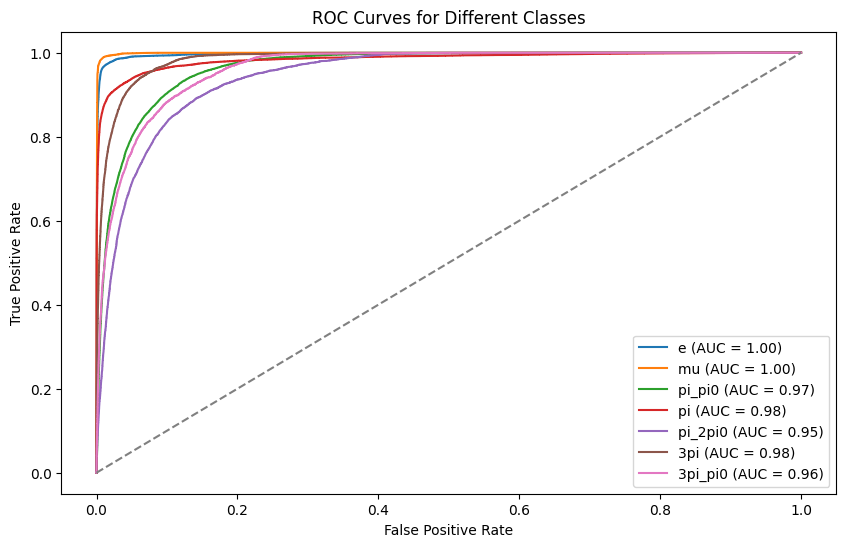

In [39]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming 'df' contains your data and 'labels_true' is a multi-class label
probs_columns = ['e', 'mu', 'pi_pi0', 'pi', 'pi_2pi0', '3pi', '3pi_pi0']
labels = df['labels_true']
fpr_list, tpr_list, auc_list = [], [], []

# Iterate over each probability column and treat it as a binary classification (one-vs-rest)
for i, prob_col in enumerate(probs_columns):
    probs = df[prob_col]  # Probabilities for the current class
    fpr, tpr, thresholds = metrics.roc_curve(labels, probs, pos_label=i)  # pos_label=i for binary ROC curve
    auc = metrics.auc(fpr, tpr)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    
    print(f"AUC for {prob_col}: {auc}")

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))
for fpr, tpr, auc, prob_col in zip(fpr_list, tpr_list, auc_list, probs_columns):
    plt.plot(fpr, tpr, label=f"{prob_col} (AUC = {auc:.2f})")
    
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Classes")
plt.legend(loc="lower right")
plt.show()